In [1]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint

# Generate a moons dataset
X, y = make_moons(n_samples = 1000, noise = 0.2, random_state = 808)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 808)

# Define XGBoost model
model = xgb.XGBClassifier(eval_metric = "logloss", random_state = 808)

- Balancing computing power with optimization.
- Random seach = random sampling, not as many datapoints but can see parts of the range where the model performs well and dive deeper into that part (see below).

In [2]:
# Define hyperparameter distributions
param_dist = {
    "n_estimators": randint(50, 300), # random integers from this range
    "learning_rate": uniform(0.01, 0.3), # uniform() creates distribution from start, range
    "max_depth": randint(2, 10),
    "subsample": uniform(0.5, 0.5), # subsampling data (start 0.5, go out 0.5 (to 1))
    "colsample_bytree": uniform(0.5, 0.5) # subsampling features
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_dist, n_iter = 20, scoring = "accuracy", 
    cv = 3, verbose = 1, random_state = 808)

# Run random search
random_search.fit(X_train, y_train)

# Get search results as a DataFrame
results = pd.DataFrame(random_search.cv_results_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [3]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.123447,0.051617,0.004369,0.002201,0.979425,0.07485,3,134,0.778079,"{'colsample_bytree': 0.9794247687859567, 'lear...",0.962547,0.962547,0.943609,0.956234,0.008927,3
1,0.287430,0.036340,0.002363,0.000135,0.850661,0.163901,8,280,0.617966,"{'colsample_bytree': 0.8506612141420485, 'lear...",0.947566,0.947566,0.936090,0.943740,0.005410,18
2,0.080462,0.001230,0.001577,0.000020,0.823521,0.125651,3,155,0.86992,"{'colsample_bytree': 0.8235205021304639, 'lear...",0.962547,0.958801,0.943609,0.954986,0.008189,4
3,0.103991,0.000676,0.001693,0.000077,0.648953,0.036181,7,96,0.647769,"{'colsample_bytree': 0.6489534600702496, 'lear...",0.943820,0.932584,0.898496,0.924967,0.019271,20
4,0.795226,0.619260,0.003240,0.000262,0.810741,0.049461,8,260,0.92317,"{'colsample_bytree': 0.8107414551062586, 'lear...",0.955056,0.955056,0.932331,0.947481,0.010713,12


In [4]:
# Extract hyperparameters and accuracy
params_to_plot = ["param_learning_rate", 
                  "param_n_estimators",
                 "param_max_depth",
                 "param_subsample",
                 "param_colsample_bytree"]

accuracy = results["mean_test_score"]

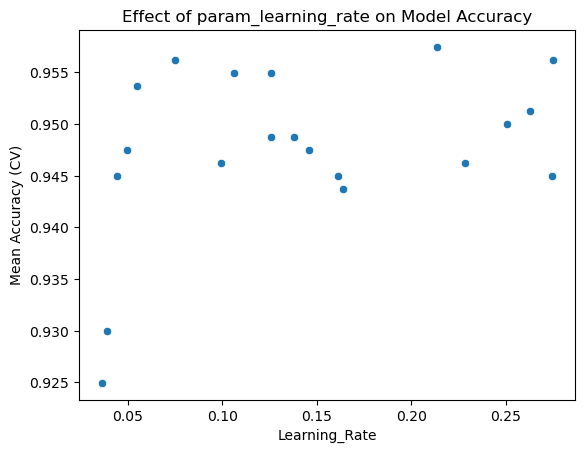

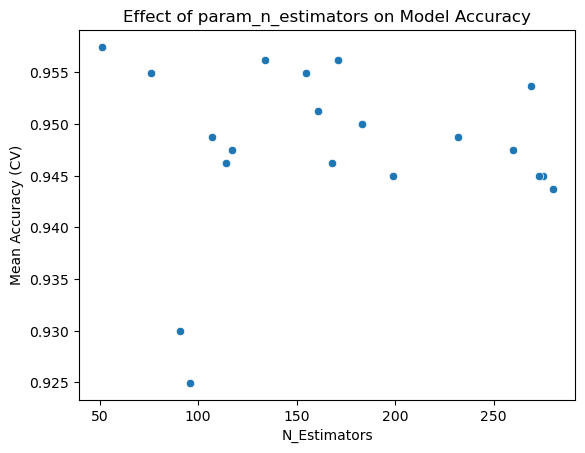

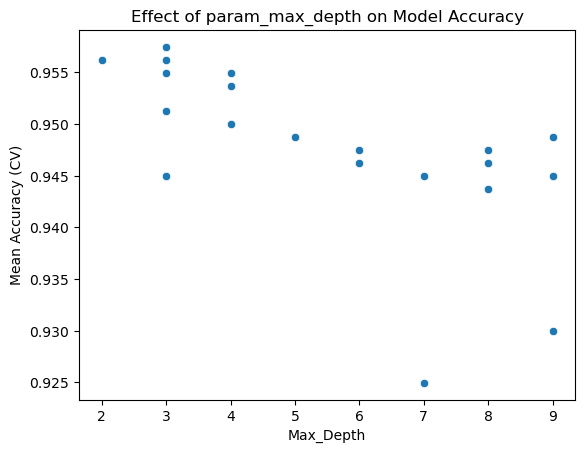

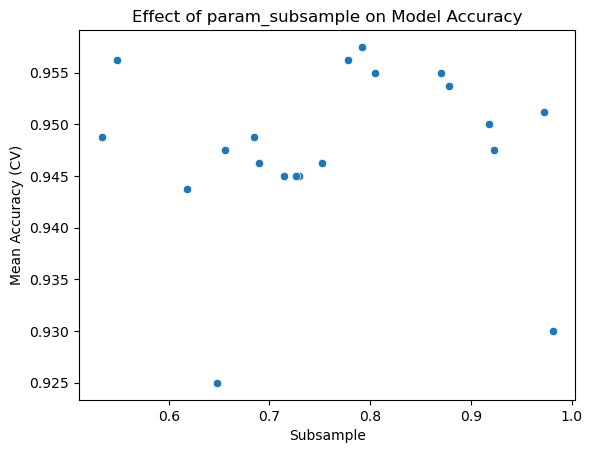

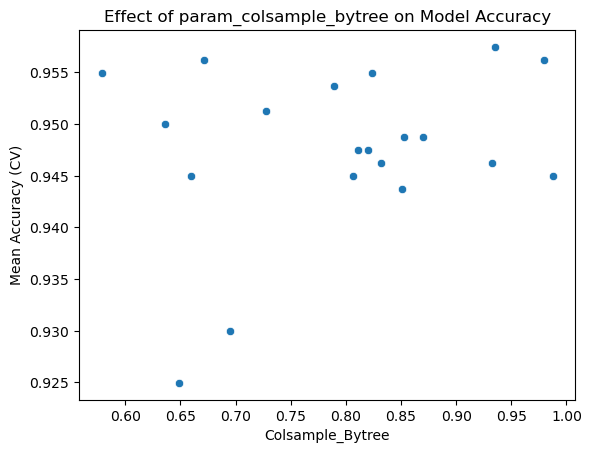

In [11]:
# Generate scatter plots for each hyperparameter vs. accuracy
for param in params_to_plot:
    sns.scatterplot(x = results[param], y = accuracy)
    plt.title(f"Effect of {param} on Model Accuracy")
    #plt.xlabel(param.replace("param_", "").replace("_", " ").title())
    plt.ylabel("Mean Accuracy (CV)")
    plt.show()

- adding trees is making the model more accurate, low n_estimators could be that there werent enough.
- weak learners are base learner for algorithm (trees with low number of levels, as max_depth increases accuracy falls off)
- subsampling rows has slight upward trend
- col sampling also has slight decreasing trend

Goal: increase model accuracy (not a clean trend)
Outliers and noise trends from interactions
Sequentially: don't use all hyperparameters at once